In [3]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [4]:
path = r'C:\Users\DELL\Desktop\speechemotion\TESS Toronto emotional speech set data'
all_images = []
labels = []

for (root, dirs, file) in os.walk(path):
    for f in file:
        all_images.append(os.path.join(root, f))
        label = f.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(all_images) == 2800:
            break
print('Dataset is Loaded')

Dataset is Loaded


In [5]:
len(all_images)

2800

In [6]:
labels[:5]

['angry', 'angry', 'angry', 'angry', 'angry']

In [7]:
df = pd.DataFrame()
df['speech'] = all_images
df['label'] = labels
df.head()

,speech,label
0,C:\Users\DELL\Desktop\speechemotion\TESS Toron...,angry
1,C:\Users\DELL\Desktop\speechemotion\TESS Toron...,angry
2,C:\Users\DELL\Desktop\speechemotion\TESS Toron...,angry
3,C:\Users\DELL\Desktop\speechemotion\TESS Toron...,angry
4,C:\Users\DELL\Desktop\speechemotion\TESS Toron...,angry


In [8]:
df['label'].value_counts()

label
angry      400
disgust    400
fear       400
happy      400
neutral    400
ps         400
sad        400
Name: count, dtype: int64

# Explorartory Data Analysis

<Figure size 800x800 with 0 Axes>

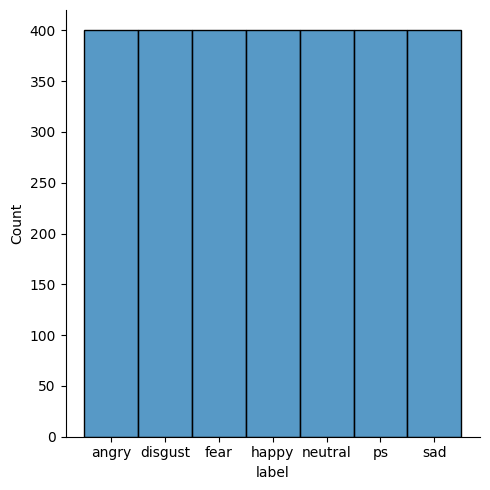

In [15]:

plt.figure(figsize = [8, 8])
sns.displot(df['label'])
#sns.displot(df['label'], palette=custom_palette)
plt.title("Distribution of Labels")
plt.show()

In [21]:
import librosa.display
def waveplot(data, sr, emotion):
    plt.figure(figsize=[10, 8])
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.show()

    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize = [11, 4])
    plt.title(emotion, size = 20)
    librosa.display.specshow(xdb, sr = sr, x_axis = 'time', y_axis = 'hz')
    plt.colorbar()

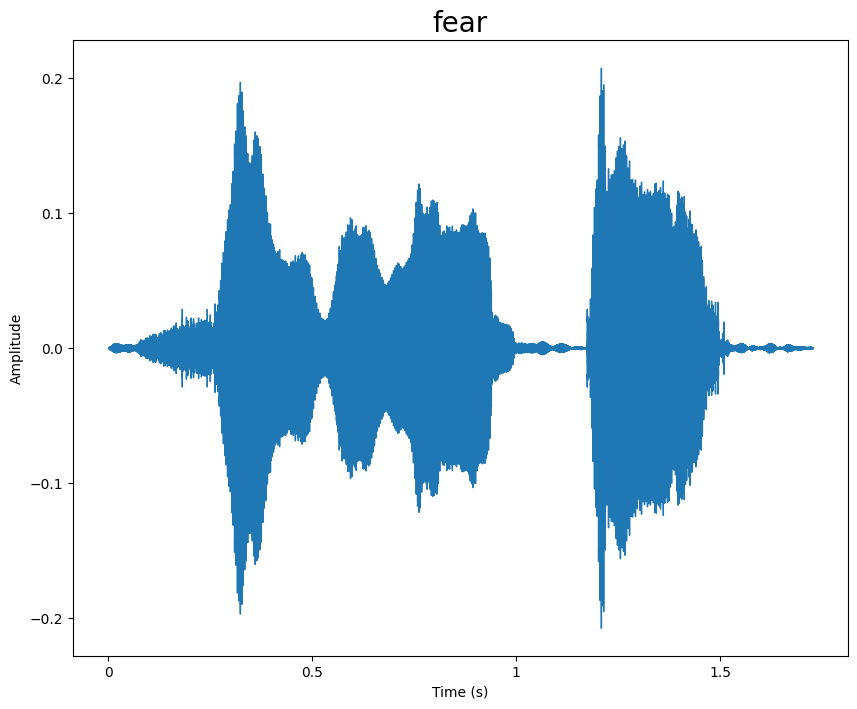

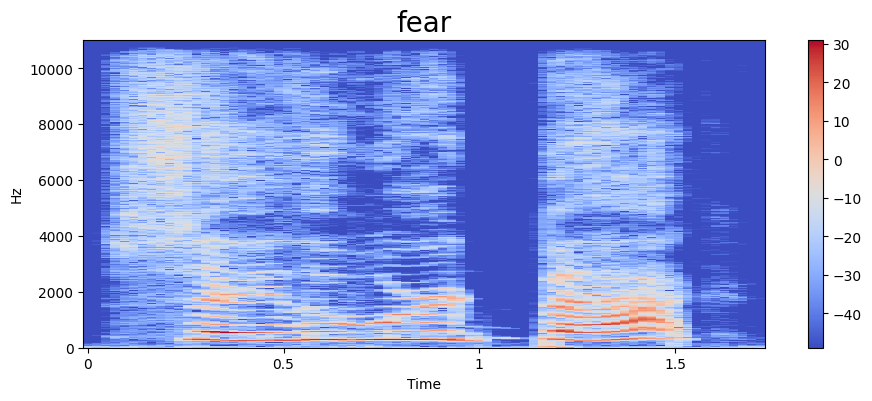

In [22]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)



In [23]:
print(f"Path: {path}")
print(f"Exists: {os.path.exists(path)}")


Path: C:\Users\DELL\Desktop\speechemotion\TESS Toronto emotional speech set data\OAF_Fear\OAF_back_fear.wav
Exists: True


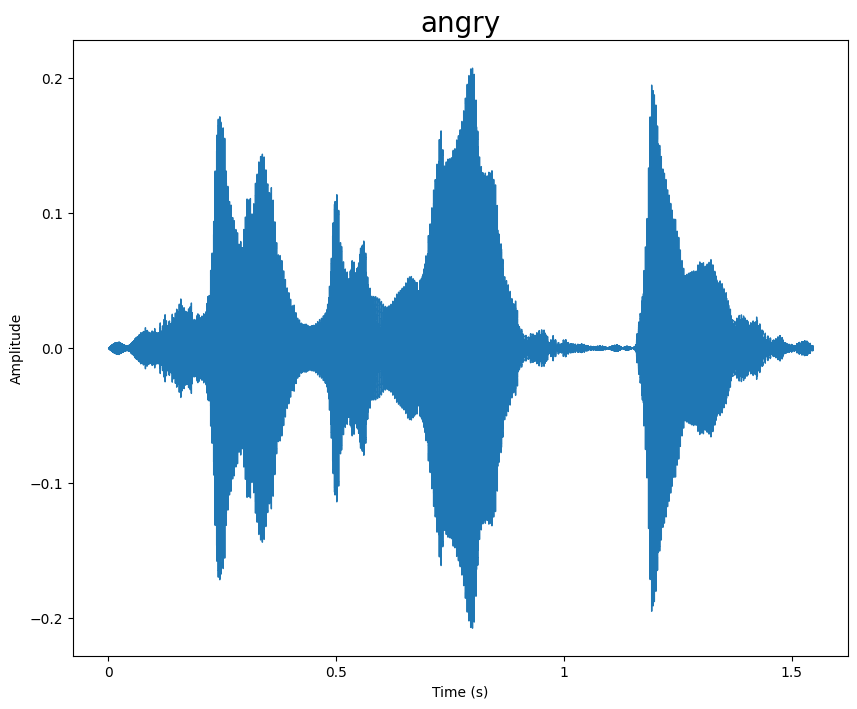

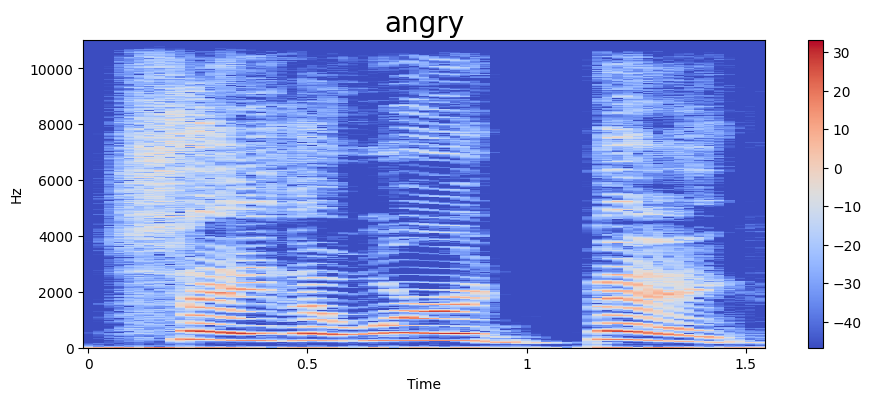

In [24]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[5]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

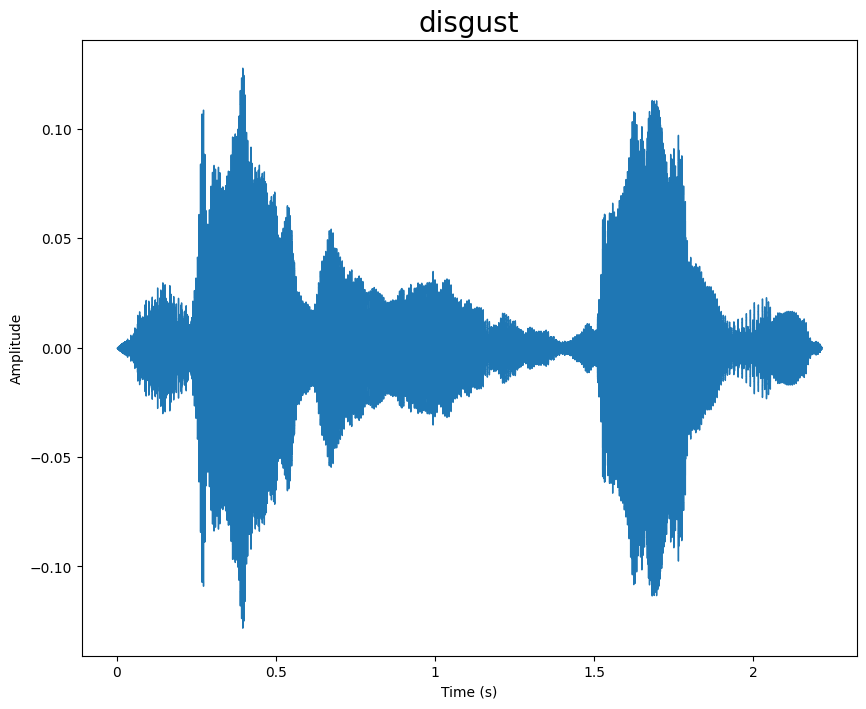

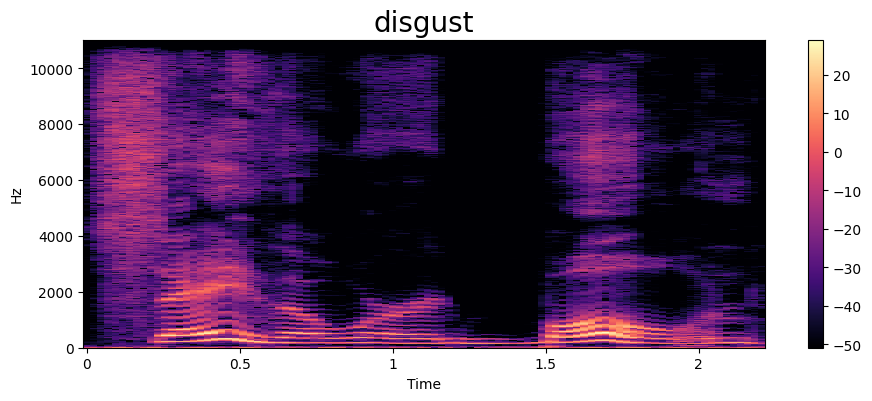

In [25]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[8]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

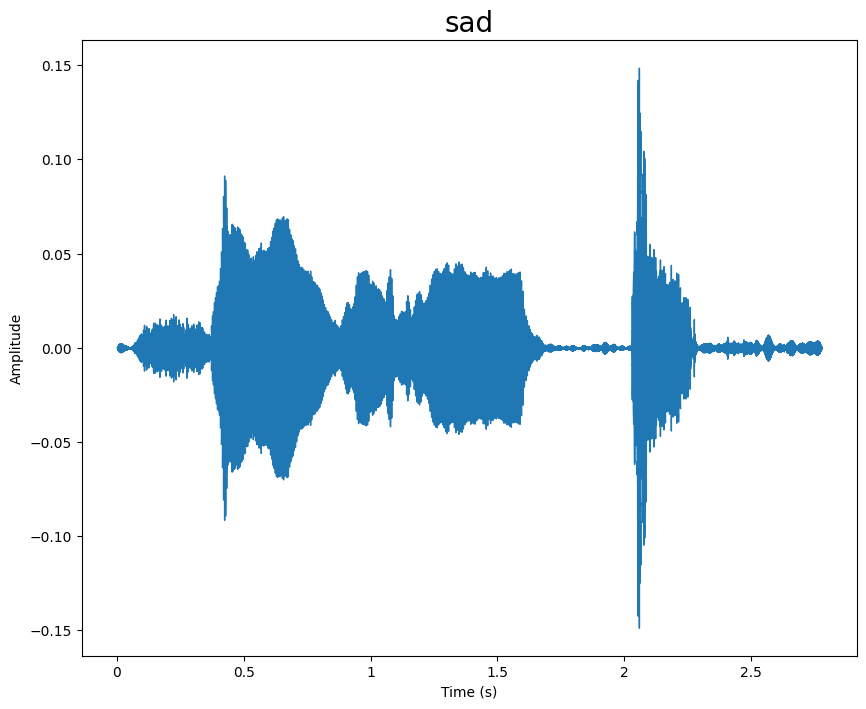

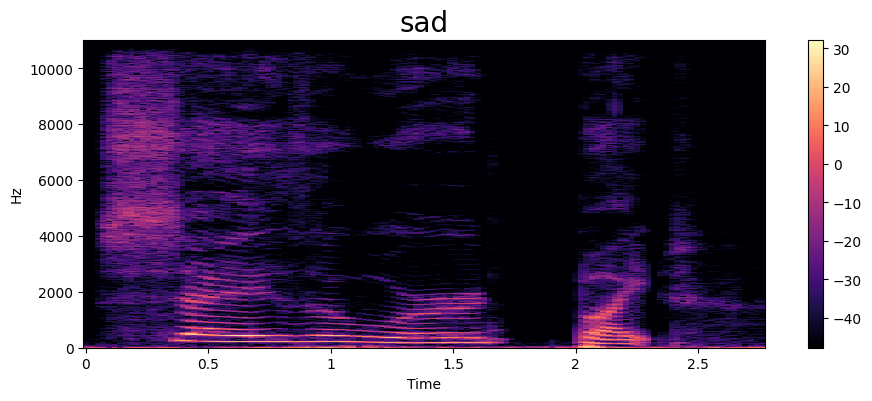

In [26]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[6]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

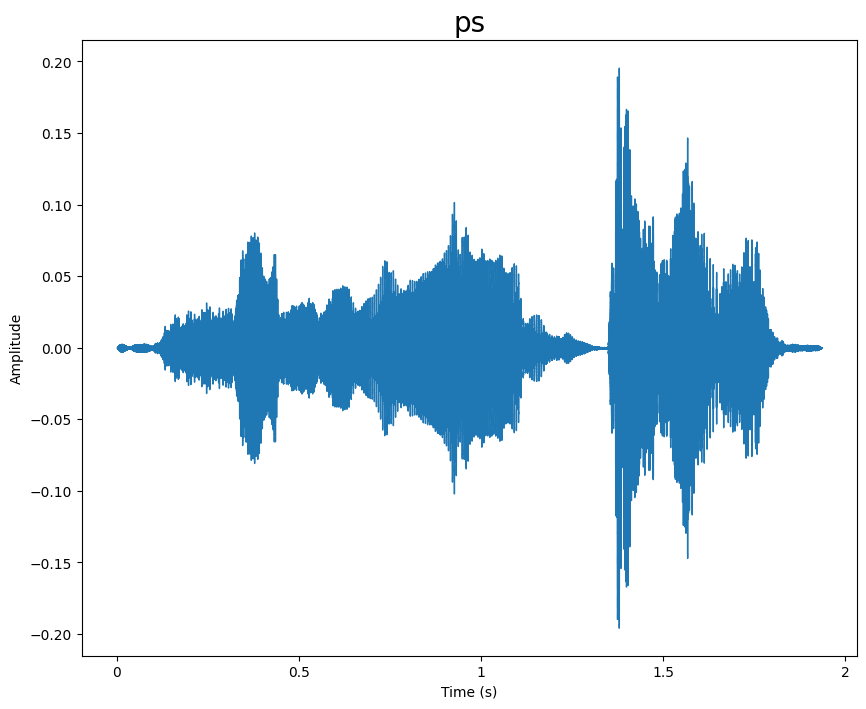

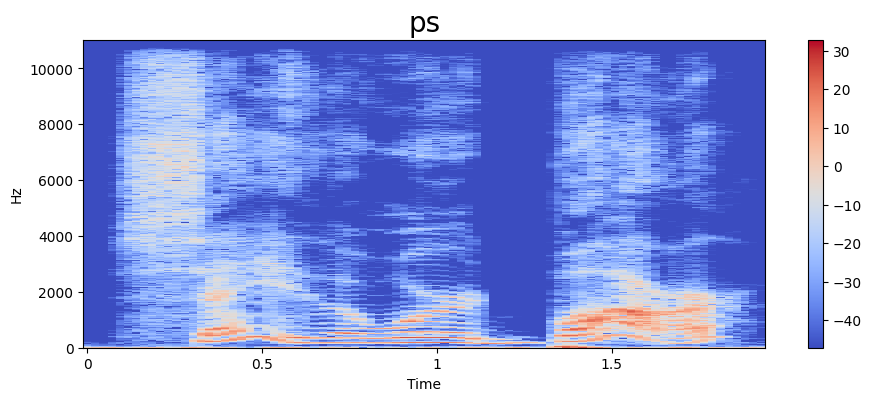

In [27]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

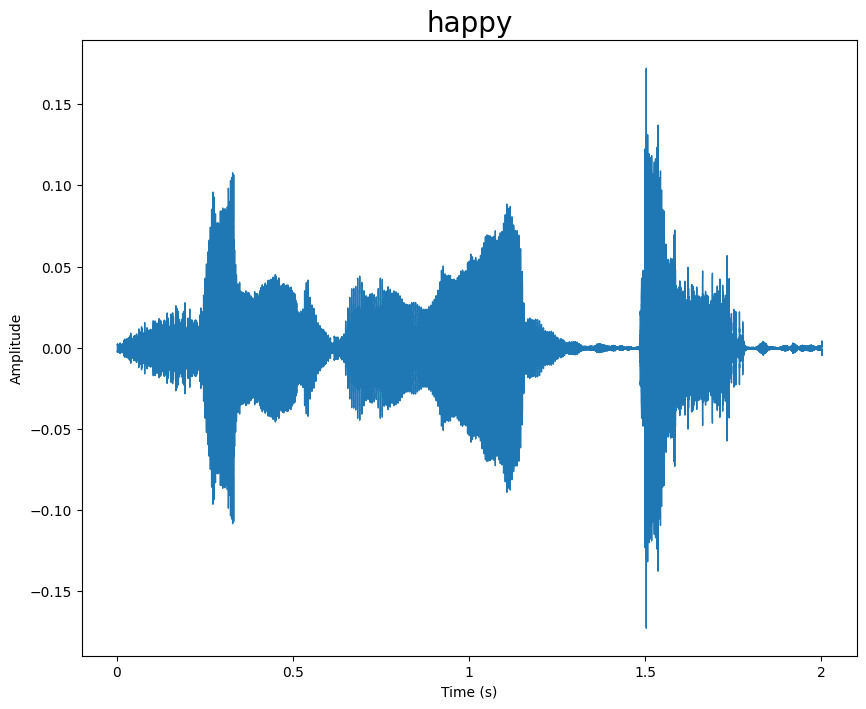

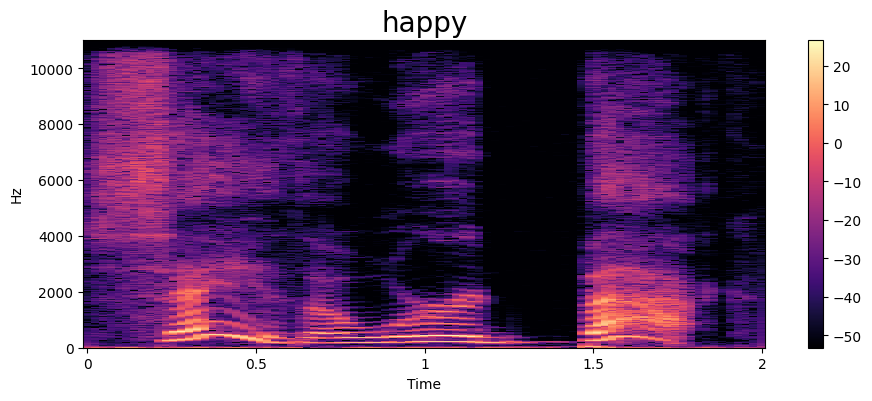

In [28]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

# Feature extraction

In [29]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration = 3, offset = 0.5)
    mfcc = np.mean(librosa.feature.mfcc(y = y, sr = sr, n_mfcc = 40).T, axis = 0)
    return mfcc

In [30]:
extract_mfcc(df['speech'][0])

array([-3.96986206e+02,  7.74405365e+01, -1.95927906e+01, -2.16666889e+01,
       -2.11275601e+00,  1.00753632e+01, -2.03667068e+01, -6.09244919e+00,
       -7.21228313e+00, -5.57366073e-01, -1.83255339e+00,  2.02101454e-01,
        7.27551103e-01,  1.31773746e+00,  2.88633752e+00,  2.85579062e+00,
       -4.71292162e+00, -4.43651056e+00, -1.62115955e+00, -1.02398405e+01,
       -7.55126190e+00, -1.79688025e+00, -7.03765249e+00,  9.43658352e+00,
        8.35585308e+00,  2.17123604e+01,  1.92169914e+01,  2.03489304e+01,
        1.34133663e+01,  8.33917236e+00,  3.94722104e-01,  5.11131477e+00,
        9.56873894e+00,  5.45486832e+00,  2.50996327e+00, -1.82390726e+00,
        4.86896229e+00,  9.31392384e+00,  2.08915043e+00, -1.90649140e+00],
      dtype=float32)

In [45]:
 #def compute_spectrogram(audio_file, n_fft=2048, hop_length=512, sr=22050):
     # load audio data
    # y, sr = librosa.load(audio_file, sr=sr)

     # compute spectrogram
     #spec = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
     #spec_db = librosa.amplitude_to_db(abs(spec))

     #return spec_db, sr

 #def plot_spectrogram(spec_db, sr, hop_length=512):
     # visualize spectrogram
  #   plt.figure(figsize=(12, 6))
   #  librosa.display.specshow(spec_db, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log')
    # plt.colorbar(format='%+2.0f dB')
    # plt.title('Spectrogram')
     #plt.tight_layout()
    # plt.show()

In [49]:
 # compute spectrogram
 #spec_db, sr = compute_spectrogram(df['speech'][5])

 # plot spectrogram
 #plot_spectrogram(spec_db, sr)

In [47]:
# def extract_chroma_features(audio_file, sr=22050, n_fft=2048, hop_length=512):
     # Load audio data
     #y, sr = librosa.load(audio_file, sr=sr)

     # Compute chroma features
     #chroma = librosa.feature.chroma_stft(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length)

     # Normalize chroma features
     #chroma_norm = librosa.util.normalize(chroma, norm=np.inf, axis=1)

    # return chroma_norm

In [50]:
 # Extract chroma features
 #chroma = extract_chroma_features(df['speech'][0])
 #chroma

In [31]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [32]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [33]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [34]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [35]:
y = y.toarray()

# Training LSTM Model

In [36]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from collections.abc import Iterable

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
print(Iterable)




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)               

In [37]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import LearningRateScheduler
import tensorflow as tf

checkpoint_filepath = 'best_model.h5'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_best_only=True,
    monitor='val_accuracy',
    mode='max',
    verbose=1)


def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

lr_scheduler_callback = LearningRateScheduler(scheduler)

history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64, callbacks=[model_checkpoint_callback, lr_scheduler_callback])

Epoch 1/50


35/35 [==============================] - ETA: 0s - loss: 1.1115 - accuracy: 0.5732
Epoch 1: val_accuracy improved from -inf to 0.35536, saving model to best_model.h5
35/35 [==============================] - 12s 152ms/step - loss: 1.1115 - accuracy: 0.5732 - val_loss: 1.8278 - val_accuracy: 0.3554 - lr: 0.0010
Epoch 2/50
35/35 [==============================] - ETA: 0s - loss: 0.4642 - accuracy: 0.8263
Epoch 2: val_accuracy improved from 0.35536 to 0.63036, saving model to best_model.h5
35/35 [==============================] - 4s 121ms/step - loss: 0.4642 - accuracy: 0.8263 - val_loss: 2.0785 - val_accuracy: 0.6304 - lr: 0.0010
Epoch 3/50
35/35 [==============================] - ETA: 0s - loss: 0.2514 - accuracy: 0.9246
Epoch 3: val_accuracy did not improve from 0.63036
35/35 [==============================] - 4s 127ms/step - loss: 0.2514 - accuracy: 0.9246 - val_loss: 1.6884 - val_accuracy: 0.6196 - lr: 0.0010
Epoch 4/50
35/35 [==============================] - ETA: 0s - l

# Plot the results

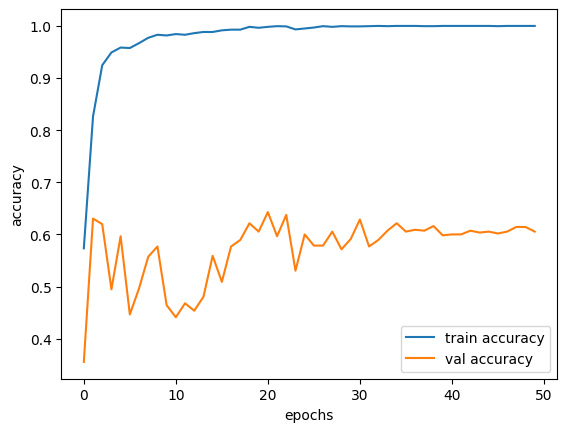

In [38]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

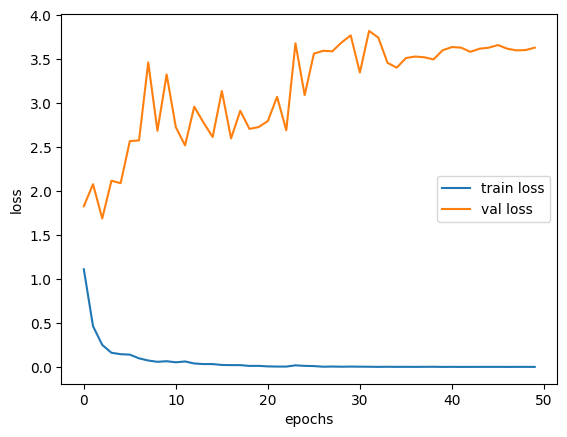

In [39]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

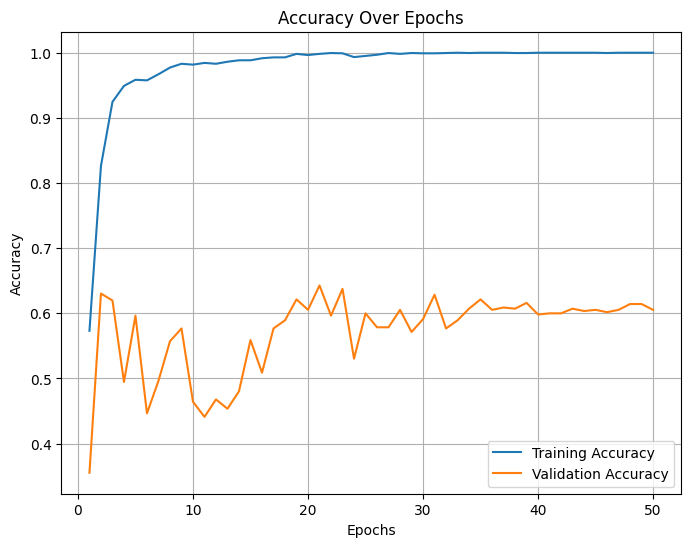

In [42]:
epochs = list(range(1, len(history.history['accuracy']) + 1))
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(8, 6))
plt.plot(epochs, train_acc, label="Training Accuracy")
plt.plot(epochs, val_acc, label="Validation Accuracy")
plt.title("Accuracy Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

In [43]:
from sklearn.metrics import classification_report, accuracy_score

# Predict the labels
y_pred = model.predict(X)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y, axis=1)

# Generate a classification report
report = classification_report(y_true_classes, y_pred_classes, target_names=enc.categories_[0])
print(report)

# Overall Accuracy
overall_accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f"Overall Accuracy: {overall_accuracy * 100:.2f}%")

88/88 [==============================] - 4s 31ms/step
              precision    recall  f1-score   support

       angry       0.73      1.00      0.84       400
     disgust       0.99      1.00      0.99       400
        fear       1.00      1.00      1.00       400
       happy       0.89      1.00      0.94       400
     neutral       1.00      1.00      1.00       400
          ps       1.00      0.61      0.76       400
         sad       1.00      0.88      0.93       400

    accuracy                           0.93      2800
   macro avg       0.94      0.93      0.93      2800
weighted avg       0.94      0.93      0.93      2800

Overall Accuracy: 92.75%


In [44]:
loss, accuracy = model.evaluate(X, y, verbose=1)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")

88/88 [==============================] - 4s 33ms/step - loss: 0.5620 - accuracy: 0.9275
Test Loss: 0.5620135068893433
Test Accuracy: 92.75%


In [41]:
#import librosa
#import numpy as np
#from tensorflow.keras.models import load_model

# Load the trained model
#model = load_model('best_model.h5')

# Load the new audio file
#path_to_audio = 'angry2.mp3'
#audio, sr = librosa.load(path_to_audio, sr=22050, duration=3, offset=0.5)

# Extract the MFCC features
#mfccs = np.mean(librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40).T, axis=0)

# Reshape the extracted MFCC features to match the input shape of the trained model
#mfccs = mfccs.reshape(1, -1)

# Normalize the extracted MFCC features using the same normalization parameters used during training
#mean = np.load('mean.npy')
#std = np.load('std.npy')
#mfccs = (mfccs - mean) / std

# Use the predict() function of the trained model to get the predicted emotion label
#prediction = model.predict(mfccs)
#emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
#predicted_emotion = emotion_labels[np.argmax(prediction)]

#print(f'The predicted emotion is: {predicted_emotion}')

FileNotFoundError: [Errno 2] No such file or directory: 'mean.npy'